In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.model_selection import train_test_split


In [10]:
ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep= ";")
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no



Variables Numéricas -> age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed


Varibles categóricas -> job, marital, education, housing , default, loan, contact, month, day_of_week, poutcome, 



age. Edad del cliente (numérico)

job. Tipo de trabajo (categórico)

marital. Estado civil (categórico)

education. Nivel de educación (categórico)

default. ¿Tiene crédito actualmente? (categórico)

housing. ¿Tiene un préstamo de vivienda? (categórico)

loan. ¿Tiene un préstamo personal? (categórico)

contact. Tipo de comunicación de contacto (categórico)

month. Último mes en el que se le ha contactado (categórico)

day_of_week. Último día en el que se le ha contactado (categórico)

duration. Duración del contacto previo en segundos (numérico)

campaign. Número de contactos realizados durante esta campaña al cliente (numérico)

pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)

previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)

poutcome. Resultado de la campaña de marketing anterior (categórico)

emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)

euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)

nr.employed. Número de empleados. Indicador trimestral (numérico)

y. TARGET. El cliente contrata un depósito a largo plazo o no.

In [11]:
ds.shape

(41188, 21)

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
ds.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
ds.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
if ds.duplicated().sum():
    ds = ds.drop_duplicates()
print(ds.shape)
ds.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no


Análisis univariante de las Variables Categóricas

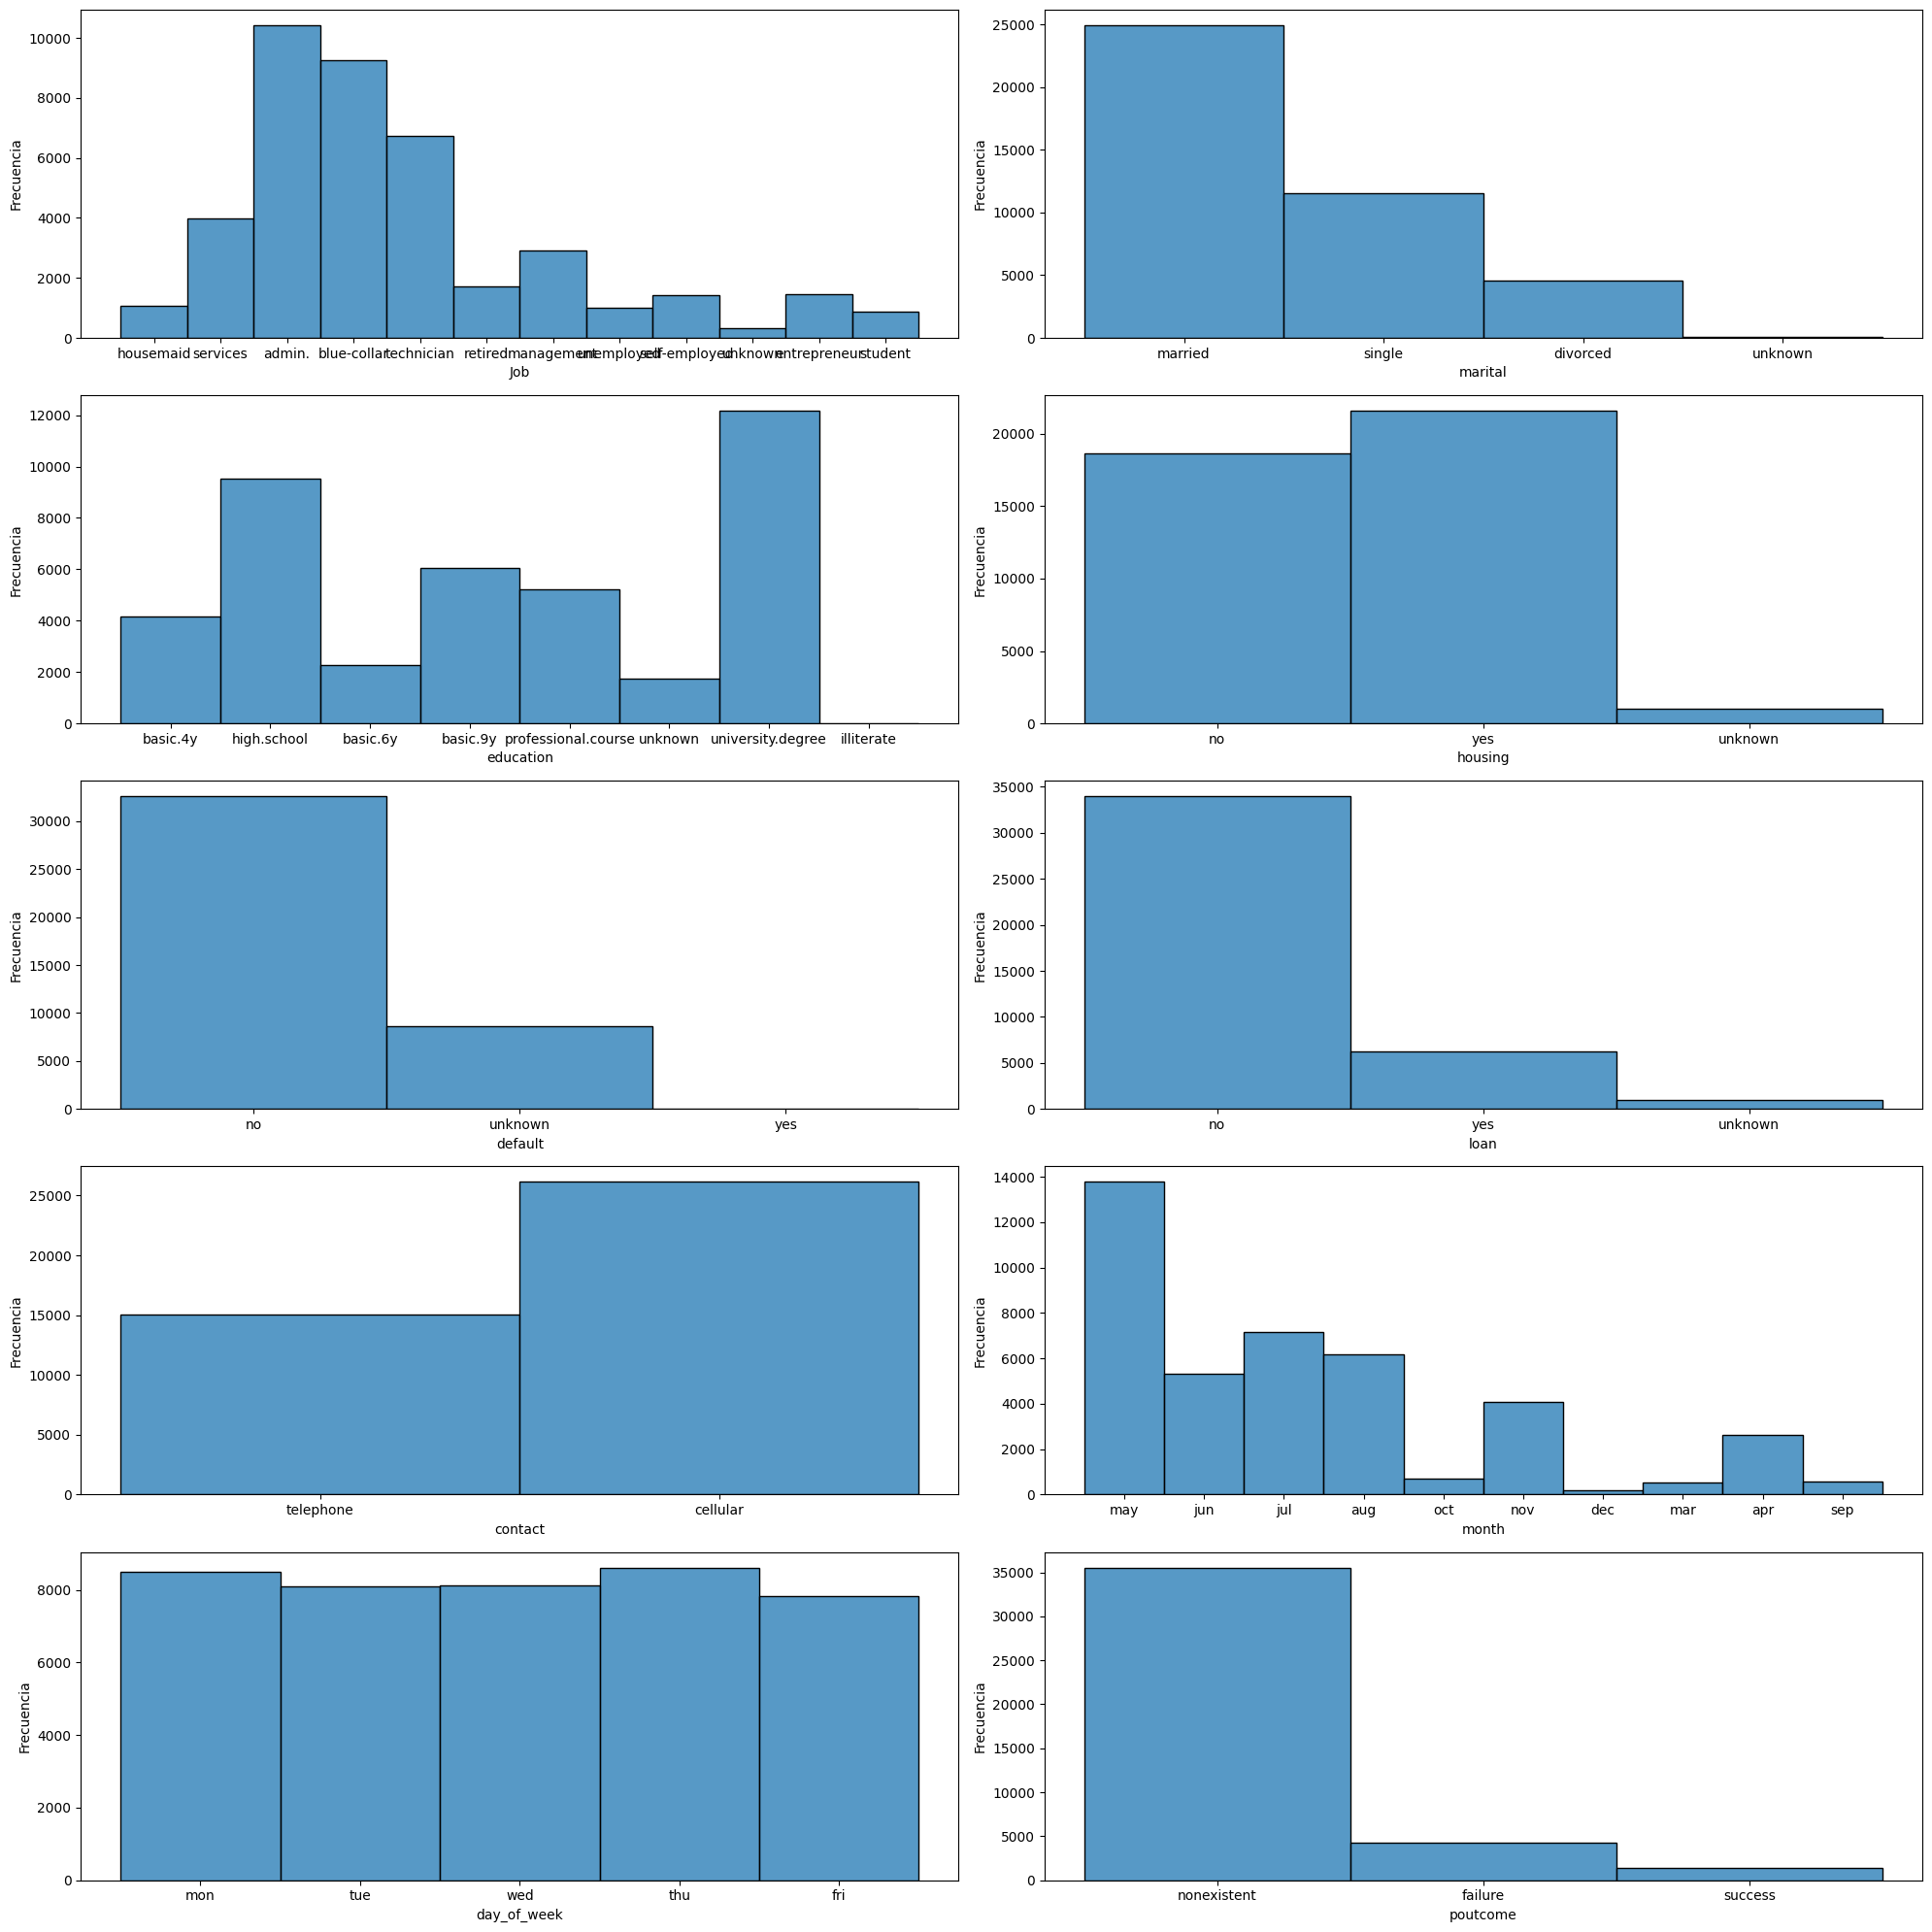

In [16]:
fig, axis = plt.subplots(5,2, figsize=(20,20))

sns.histplot(ax= axis[0,0], x= ds.job)
axis[0,0].set_xlabel('Job')
axis[0,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[0,1], x= ds.marital)
axis[0,1].set_xlabel('marital')
axis[0,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[1,0], x= ds.education)
axis[1,0].set_xlabel('education')
axis[1,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[1,1], x= ds.housing)
axis[1,1].set_xlabel('housing')
axis[1,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[2,0], x= ds.default)
axis[2,0].set_xlabel('default')
axis[2,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[2,1], x= ds.loan)
axis[2,1].set_xlabel('loan')
axis[2,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[3,0], x= ds.contact)
axis[3,0].set_xlabel('contact')
axis[3,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[3,1], x= ds.month)
axis[3,1].set_xlabel('month')
axis[3,1].set_ylabel('Frecuencia')

sns.histplot(ax= axis[4,0], x= ds.day_of_week)
axis[4,0].set_xlabel('day_of_week')
axis[4,0].set_ylabel('Frecuencia')

sns.histplot(ax= axis[4,1], x= ds.poutcome)
axis[4,1].set_xlabel('poutcome')
axis[4,1].set_ylabel('Frecuencia')




plt.tight_layout()
plt.show()


Análisis Multivariante: Var. Categóricas - Objetivo

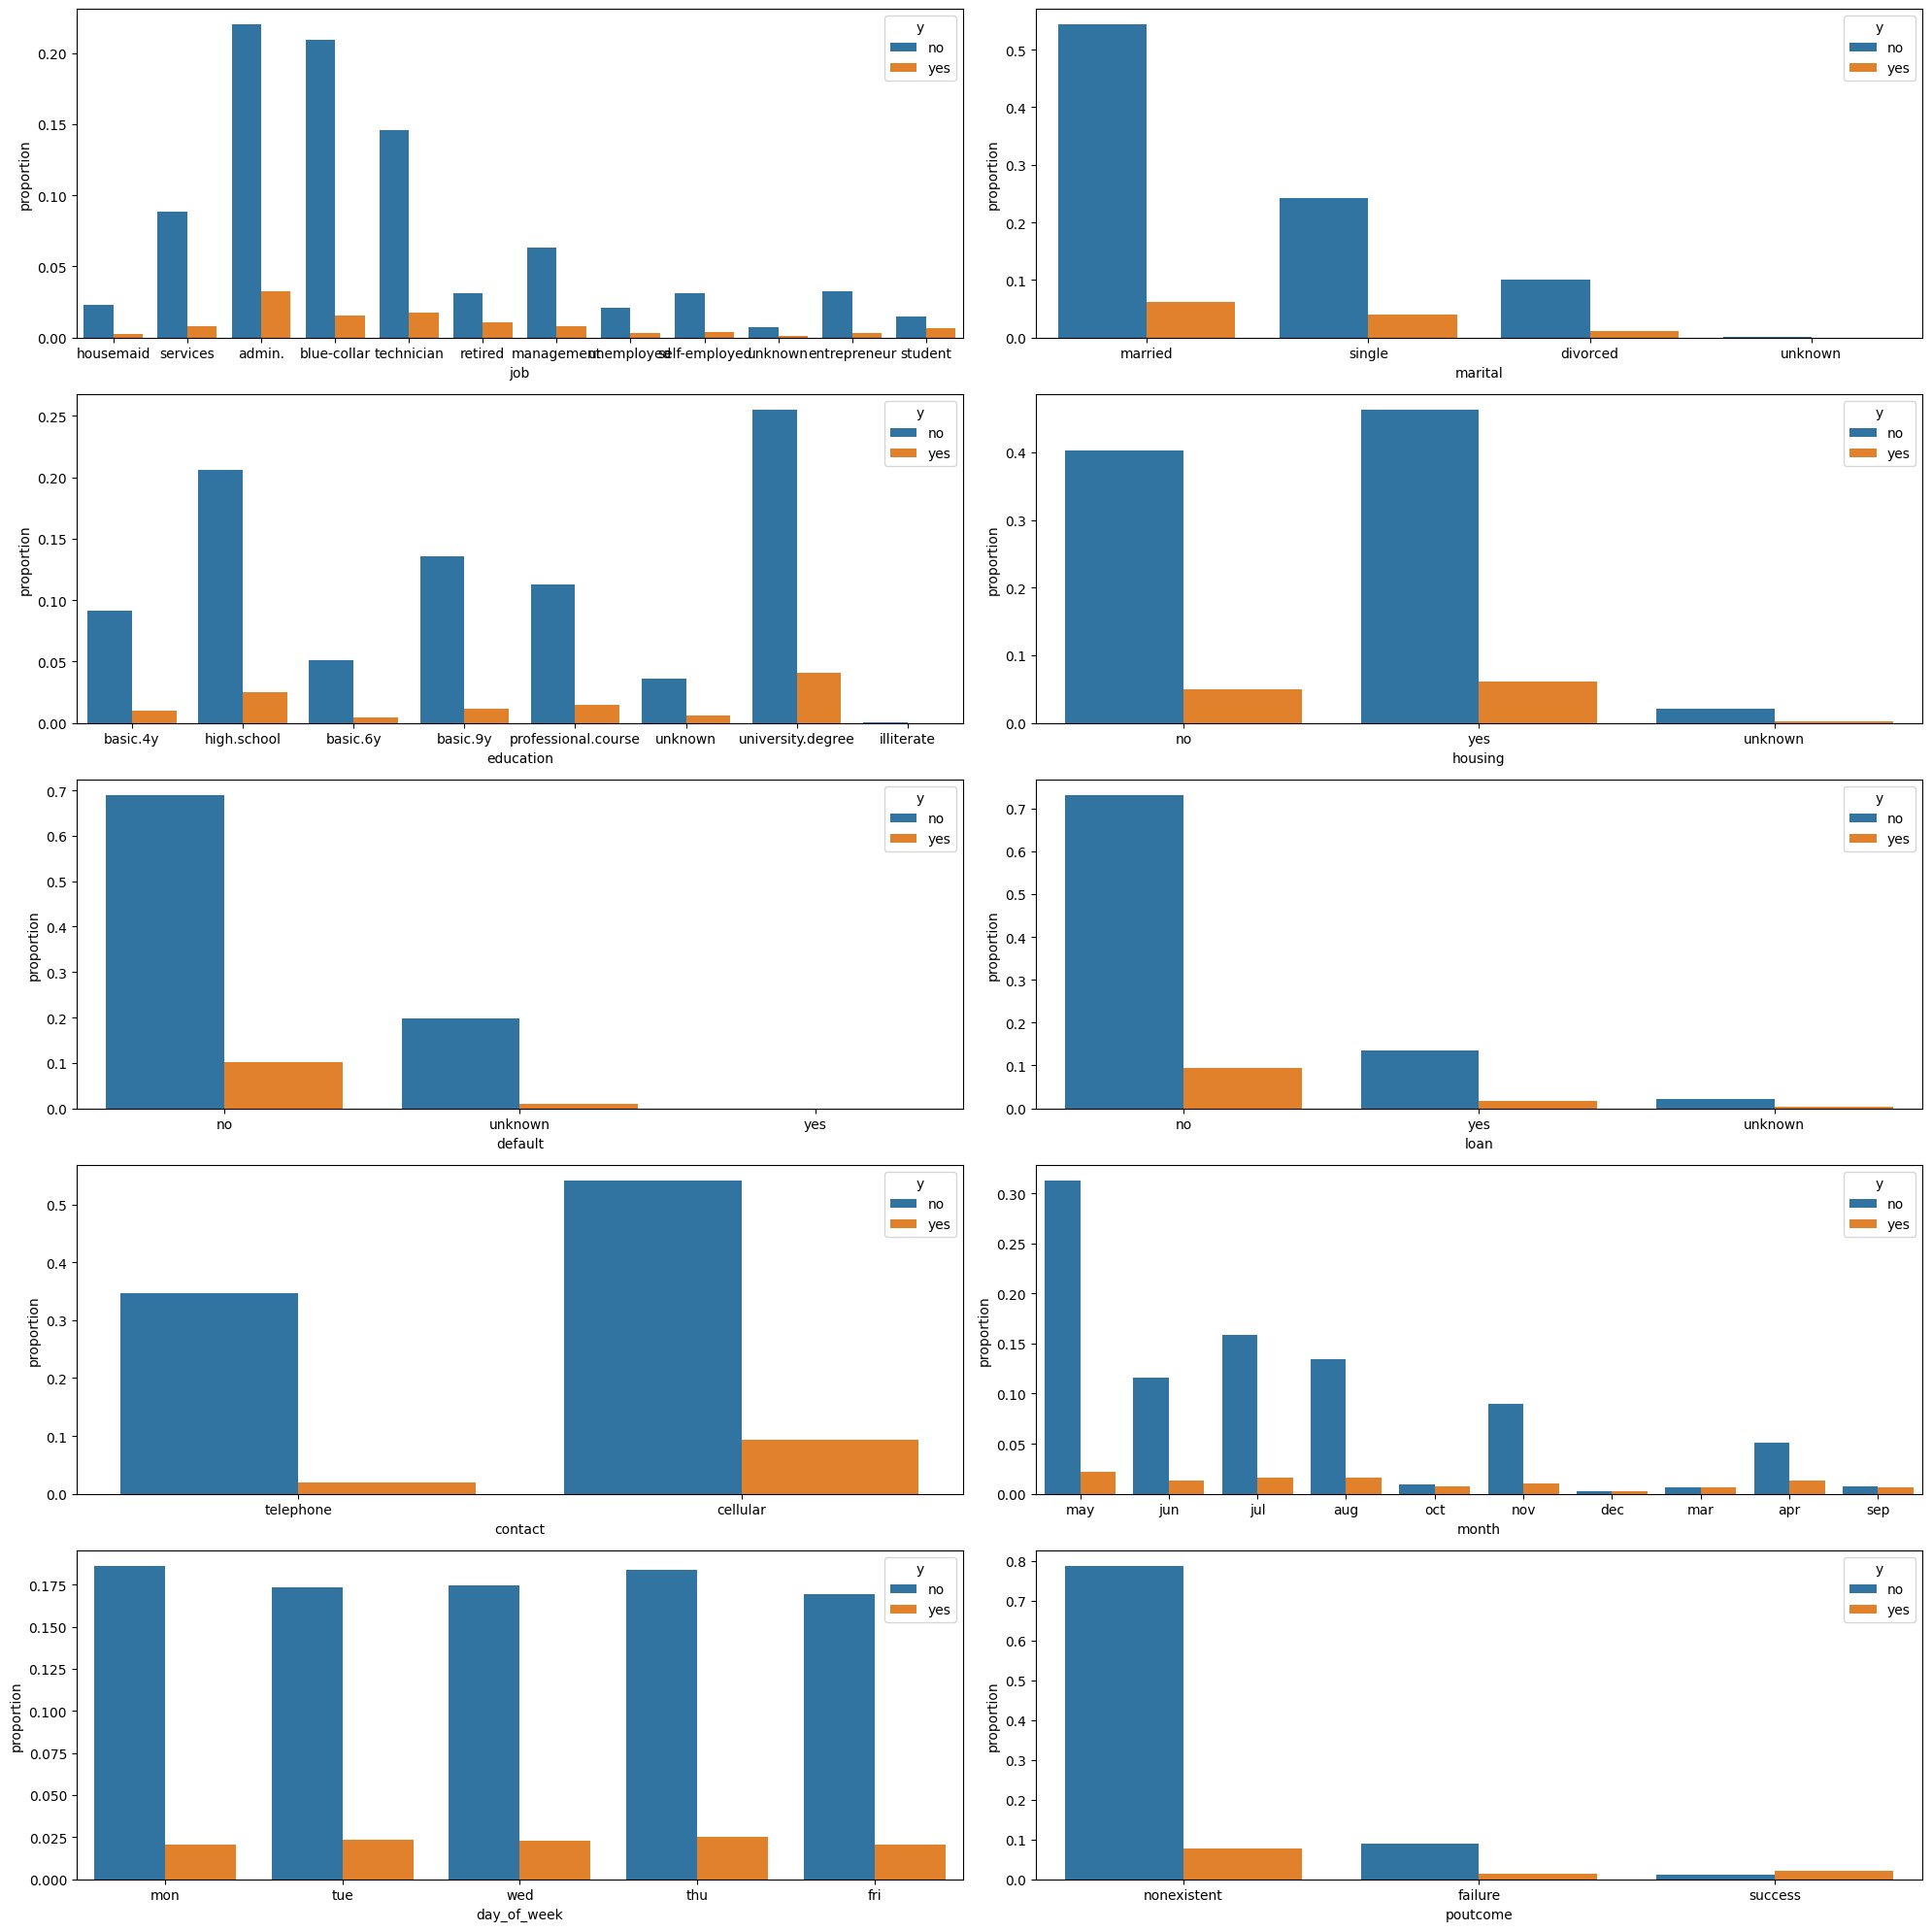

In [18]:
fig, axis = plt.subplots(5,2, figsize=(20,20))


#job, marital, education, housing , default, loan, contact, month, day_of_week, poutcome

sns.countplot(ax = axis[0, 0], data = ds, x = "job", hue = "y",stat="proportion")
sns.countplot(ax = axis[0, 1], data = ds, x = "marital", hue = "y",stat="proportion")
sns.countplot(ax = axis[1, 0], data = ds, x = "education", hue = "y",stat="proportion")
sns.countplot(ax = axis[1, 1], data = ds, x = "housing", hue = "y",stat="proportion")
sns.countplot(ax = axis[2, 0], data = ds, x = "default", hue = "y",stat="proportion")
sns.countplot(ax = axis[2, 1], data = ds, x = "loan", hue = "y",stat="proportion")
sns.countplot(ax = axis[3, 0], data = ds, x = "contact", hue = "y",stat="proportion")
sns.countplot(ax = axis[3, 1], data = ds, x = "month", hue = "y",stat="proportion")
sns.countplot(ax = axis[4, 0], data = ds, x = "day_of_week", hue = "y",stat="proportion")
sns.countplot(ax = axis[4, 1], data = ds, x = "poutcome", hue = "y",stat="proportion")

plt.tight_layout()
plt.show()

Análisis Multivariable: var. Numéricas - Objetivo

A simple vista puedo ver que la relación en "job" de la característica student es bastante más equilibrada entre el Y= si y el Y=no, que para el resto de los atributos de la variable. 

Llama la atención la distribución uniforme en la relacion entre Y= si y el Y=no en "day_of_week", lo que podría sugerir que es una variable poco o nada influyente en el resultado.

En la variable "outcome", que apunta al resultado de la campaña anterior, podemos ver que para aquellos casos en los uqe había sido exitosa suma más resultados de éxito que de fraaso.

In [19]:
ds.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [20]:
# Uso Factorize para transformar la variable a categórica numérica.

# Variables Numéricas -> age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

pd.set_option('mode.chained_assignment', None)


ds["y_n"] = pd.factorize(ds["y"])[0]

y_n_codes = ds["y_n"]
y_labels = ds.y


y_a_categoria = dict(zip(y_n_codes, y_labels))
y_a_categoria

{0: 'no', 1: 'yes'}

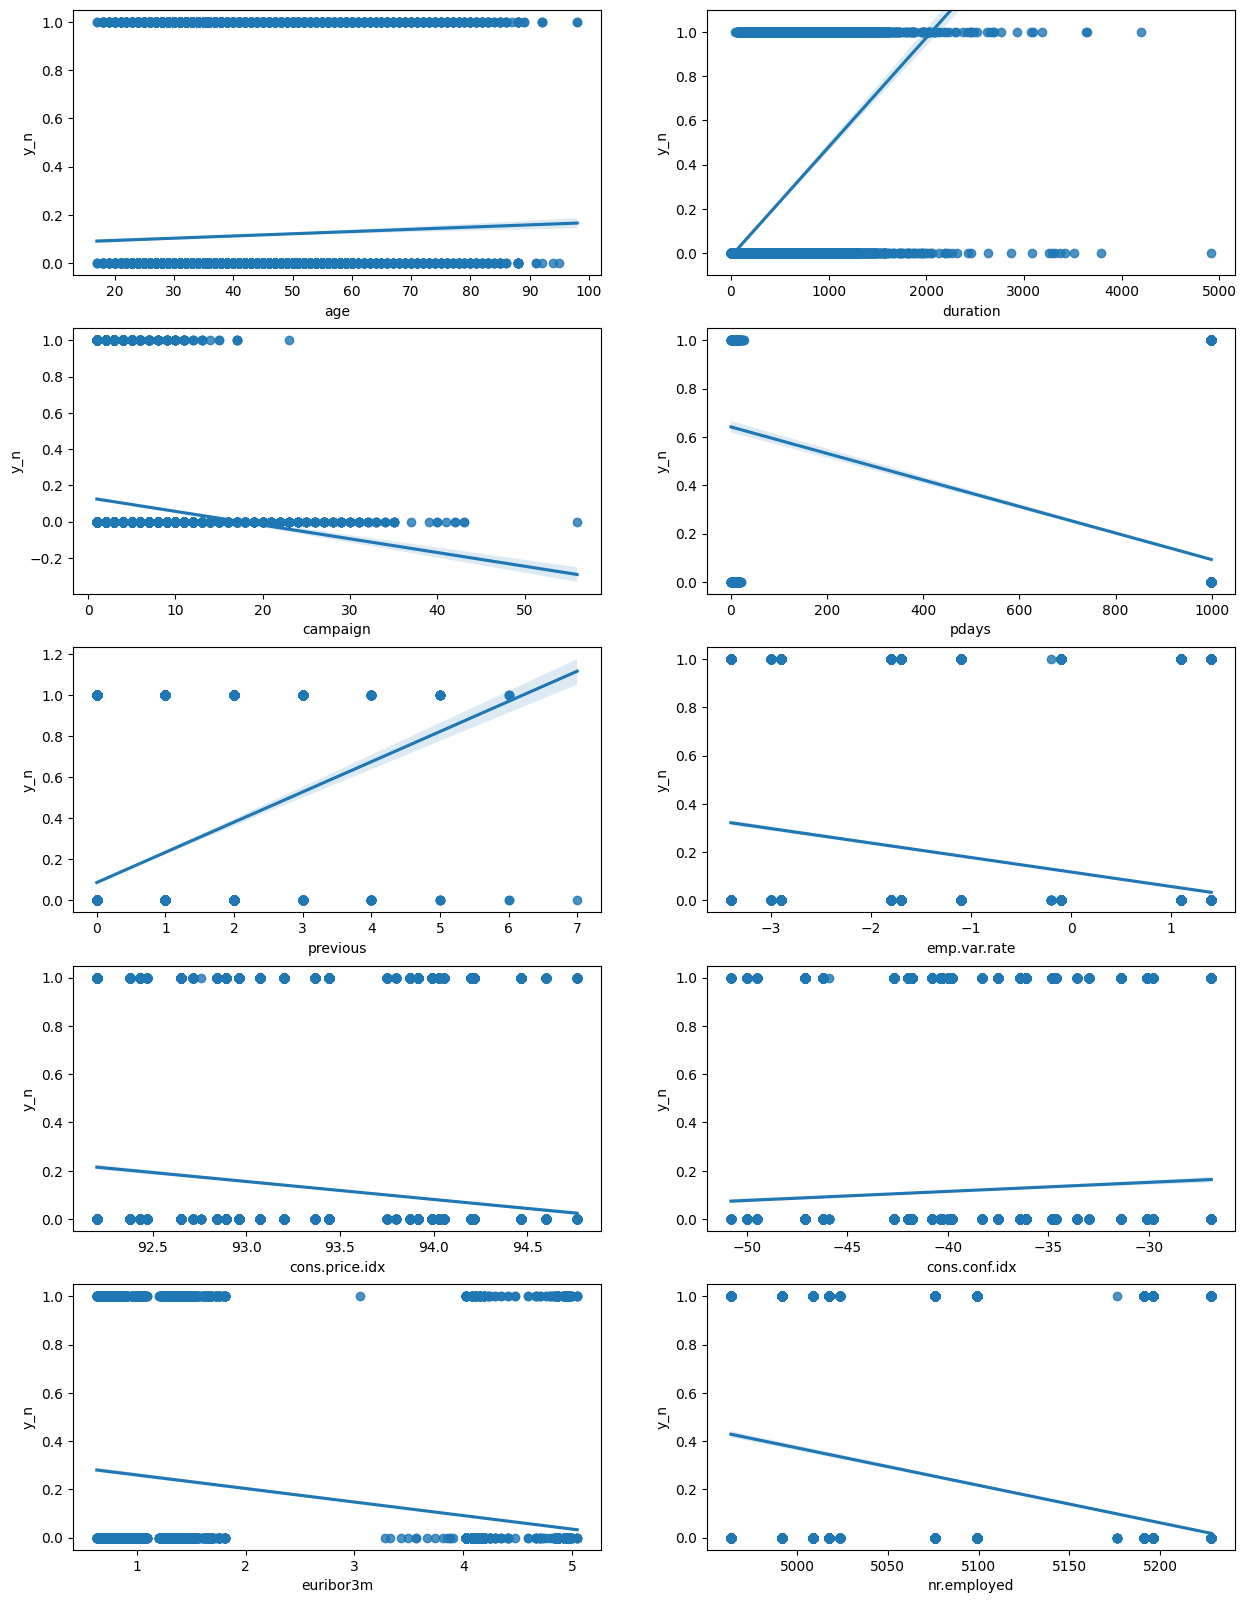

In [21]:
fig, axis = plt.subplots(5, 2, figsize=(15, 20))

sns.regplot(ax= axis[0,0], data=ds, x="age", y="y_n")
sns.regplot(ax= axis[0,1], data=ds, x="duration", y="y_n")
sns.regplot(ax= axis[1,0], data=ds, x="campaign", y="y_n")
sns.regplot(ax= axis[1,1], data=ds, x="pdays", y="y_n")
sns.regplot(ax= axis[2,0], data=ds, x="previous", y="y_n")
sns.regplot(ax= axis[2,1], data=ds, x="emp.var.rate", y="y_n")
sns.regplot(ax= axis[3,0], data=ds, x="cons.price.idx", y="y_n")
sns.regplot(ax= axis[3,1], data=ds, x="cons.conf.idx", y="y_n")
sns.regplot(ax= axis[4,0], data=ds, x="euribor3m", y="y_n")
sns.regplot(ax= axis[4,1], data=ds, x="nr.employed", y="y_n")

axis[0, 1].set_ylim(-0.1, 1.1)

plt.tight_layout
plt.show()

Conclusiones (observar tendencias)

En la relación entre las variables numéricas y el objetivo, podemos notar que alguna tendencia significativa:

"duration" -> Duración de la llamada-> Muestra una marcada tendencia positiva. A mayor duración de la llamada, más se tiende a que sea un cliente el cual contrata un depósito.

"previous" -> Número de contactos realizados durante la campaña anterior al cliente (numérico) -> Marca una tendencia positiva. Antes más llamadas que se hayan hecho en la campaña anterrior, más tiende a ser un cliente que contrata un depósito a largo plazo.

"pdays" -> Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) -> Marca una tendencia negativa. Mientras menos días hayan transcurrido desde la última campaña gasta el nuevo contacto, más tiende a ser un cliente que compre. 



La regresión logística funciona cn variables numéricas, motivo por el cual debemos asignar un valor numérico a las variables categóricas.

In [22]:
ds["job_n"] = pd.factorize(ds["job"])[0]
ds["marital_n"] = pd.factorize(total_data["marital"])[0]
ds["education_n"] = pd.factorize(total_data["education"])[0]
ds["default_n"] = pd.factorize(total_data["default"])[0]
ds["housing_n"] = pd.factorize(total_data["housing"])[0]
ds["loan_n"] = pd.factorize(total_data["loan"])[0]
ds["contact_n"] = pd.factorize(total_data["contact"])[0]
ds["month_n"] = pd.factorize(total_data["month"])[0]
ds["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
ds["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]

job_n_codes = ds["job_n"]
job_labels = ds.job

martial_n_codes = ds["marital_n"]
martial_labels = ds.marital

edu_n_codes = ds["education_n"]
edu_labels = ds.education

defau_n_codes = ds["default_n"]
defau_labels = ds.default

house_n_codes = ds["housing_n"]
house_labels = ds.housing

loan_n_codes = ds["loan_n"]
loan_labels = ds.loan_n

contact_n_codes = ds["contact_n"]
contact_labels = ds.contact

motnh_n_codes = ds["month_n"]
month_labels = ds.month

week_n_codes = ds["day_of_week_n"]
week_labels = ds.day_of_week

outcome_n_codes = ds["poutcome_n"]
outcome_labels = ds.poutcome




y_a_categoria = dict(zip(y_n_codes, y_labels))
y_a_categoria

NameError: name 'total_data' is not defined